<a href="https://colab.research.google.com/github/zamanali23/linear_regression/blob/main/linear_reg_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df=pd.read_csv('/content/SeoulBikeData.csv')

In [5]:
df.drop(['Date'],axis=1,inplace=True)

In [6]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
df.tail()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   object 
 11  Holiday                   8760 non-null   object 
 12  Functioning Day           8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 889.8+ KB


count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64


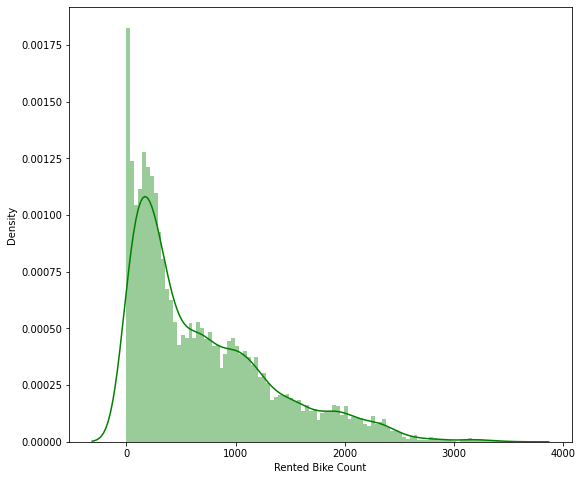

In [10]:
print(df['Rented Bike Count'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Rented Bike Count'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [11]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


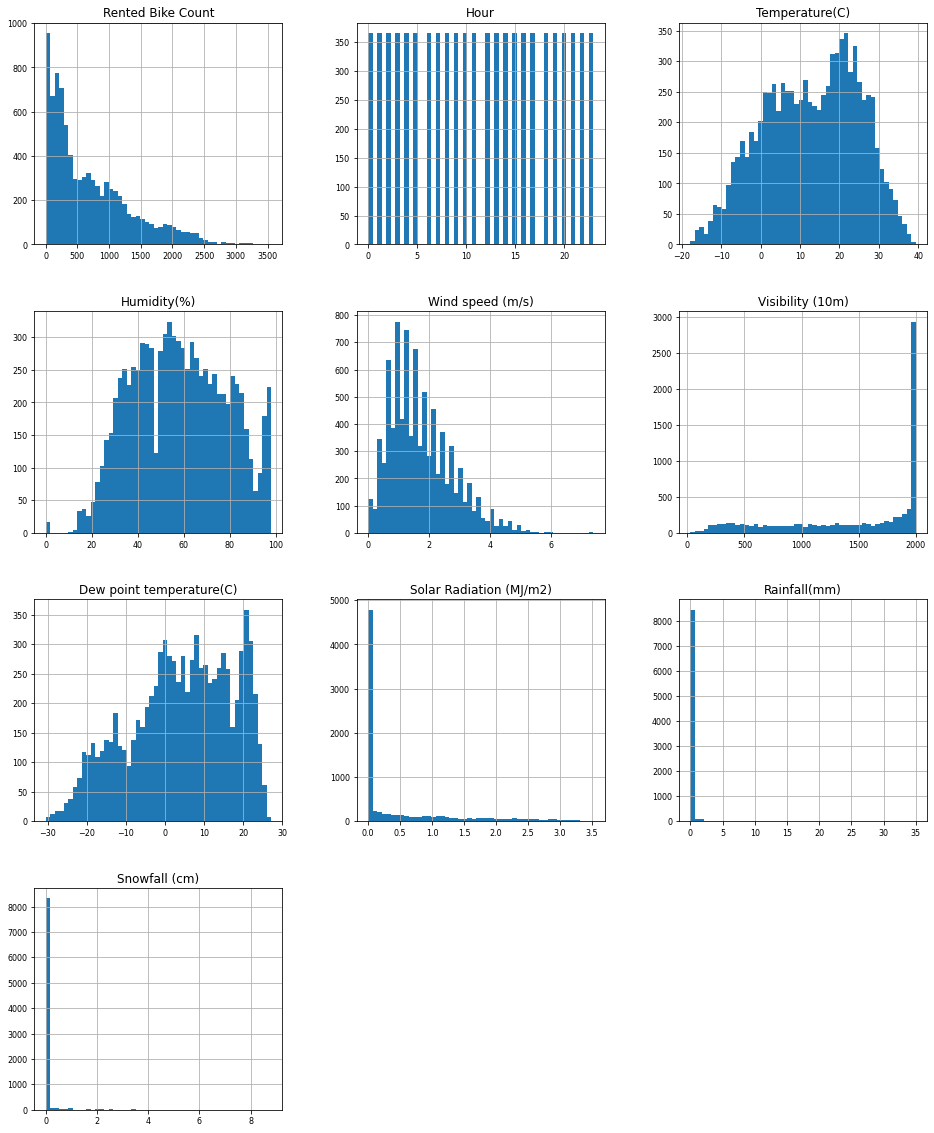

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

# **What are the factors that influence the number of bikes rented?**


# **Correlation**

In [14]:
df_num.cov()
## Covariance - covariance is when two items vary together.
## Covariance eg. -  when s&p increases, stock price will increase or vice versa

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,416021.733390,1831.818358,4149.257754,-2623.853782,80.950203,78187.849382,3199.299111,146.717508,-89.558657,-39.946114
Hour,1831.818358,47.922137,10.262907,-34.062222,2.045964,415.850668,0.276150,0.872813,0.068061,-0.065053
Temperature(C),4149.257754,10.262907,142.678850,38.763038,-0.448739,252.817084,142.400017,3.668334,0.677602,-1.139387
Humidity(%),-2623.853782,-34.062222,38.763038,414.627875,-7.104540,-6726.950421,142.782065,-8.171237,5.430677,0.962098
Wind speed (m/s),80.950203,2.045964,-0.448739,-7.104540,1.073918,108.114660,-2.388639,0.299140,-0.023002,-0.001609
Visibility (10m),78187.849382,415.850668,252.817084,-6726.950421,108.114660,370027.323001,-1403.253586,79.130141,-115.040313,-32.330842
Dew point temperature(C),3199.299111,0.276150,142.400017,142.782065,-2.388639,-1403.253586,170.573247,1.070865,1.850620,-0.860668
Solar Radiation (MJ/m2),146.717508,0.872813,3.668334,-8.171237,0.299140,79.130141,1.070865,0.754720,-0.072813,-0.027432
Rainfall(mm),-89.558657,0.068061,0.677602,5.430677,-0.023002,-115.040313,1.850620,-0.072813,1.272819,0.004188
Snowfall (cm),-39.946114,-0.065053,-1.139387,0.962098,-0.001609,-32.330842,-0.860668,-0.027432,0.004188,0.190747


In [15]:
## Correlation - Correlation is when the change in one item may result in the change in another item.
## correlation eg. - when speed increased milage will decrease
df_num_corr = df_num.corr()['Rented Bike Count'][1:]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with number of bikes rented are :\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with number of bikes rented are :
Temperature(C)    0.538558
Name: Rented Bike Count, dtype: float64


In [16]:
df_num_nocorr = df_num.corr()['Rented Bike Count'][1:]
golden_nofeatures_list = df_num_nocorr[abs(df_num_nocorr) < 0.5].sort_values(ascending=False)
print("There is {} not strongly correlated values with number of bikes rented are :\n{}".format(len(golden_nofeatures_list), golden_nofeatures_list))

There is 8 not strongly correlated values with number of bikes rented are :
Hour                        0.410257
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Visibility (10m)            0.199280
Wind speed (m/s)            0.121108
Rainfall(mm)               -0.123074
Snowfall (cm)              -0.141804
Humidity(%)                -0.199780
Name: Rented Bike Count, dtype: float64


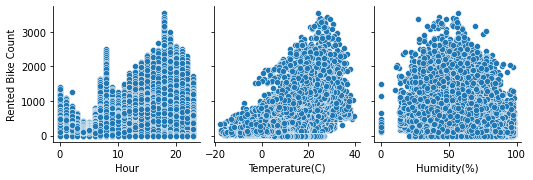

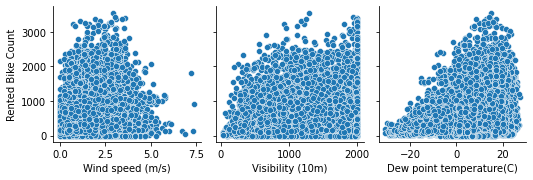

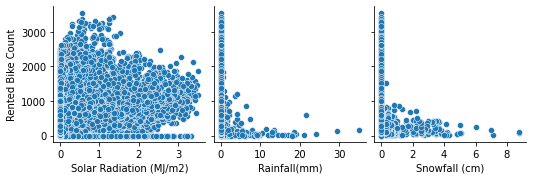

In [17]:
for i in range(1, len(df_num.columns), 3):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+3],
                y_vars=['Rented Bike Count'])

Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the rented bike count.

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

# **Explore the data for outliers and missing values.**

In [18]:
miss_val = df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [19]:
import operator

individual_features_df = []
for i in range(1,len(df_num.columns)): 
    tmpDf = df_num[[df_num.columns[i], 'Rented Bike Count']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Rented Bike Count'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

    Humidity(%): -0.20407346117136127
   Rainfall(mm): -0.14674938197591617
  Snowfall (cm): -0.0895128090651808
Solar Radiation (MJ/m2): 0.08412491780654438
Wind speed (m/s): 0.11711588469139342
Visibility (10m): 0.19928029673135905
Dew point temperature(C): 0.38175102972365543
           Hour: 0.4212550860721857
 Temperature(C): 0.5380977340753922


In [20]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with Rented Bike Count:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Rented Bike Count:
['Temperature(C)']



# **Feature to feature relationship**

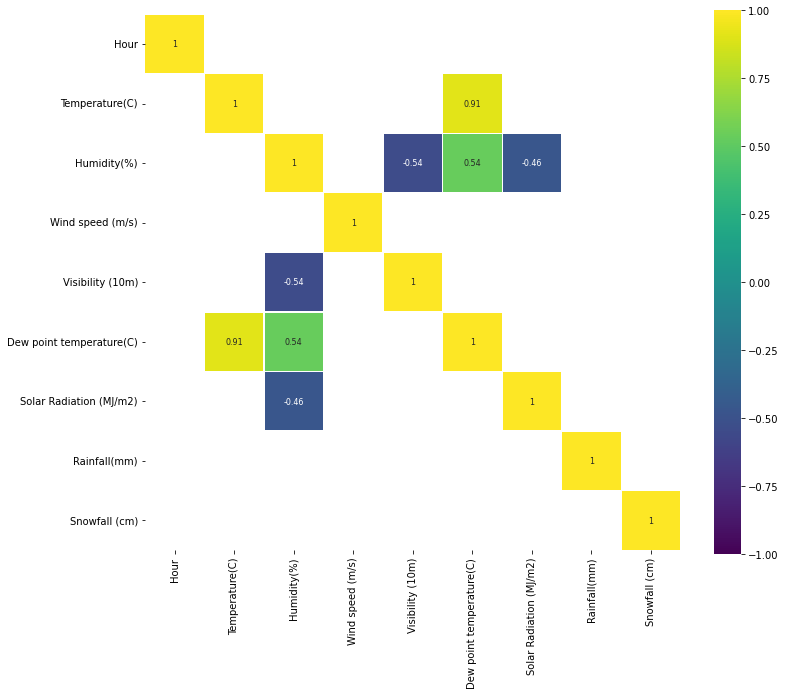

In [21]:
corr = df_num.drop('Rented Bike Count', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


A lot of features seems to be correlated between each other but some of them such as Dew Point temperature(C)/Temperature(C) may just indicate rented bike count inflation.IN a good weather (not cold) people will rent more bikes.

Now for the ones which are less obvious we can see that:

There is a strong negative correlation between Humidity(%),Visibilty(10m),Solar Radiation(MJ/M2).These factors are interesting and may indicate that people gives an importance of not renting a bike in extreme weather condition to avoid accedents.

In [22]:
quantitative_features_list = ['Rented Bike Count','Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [23]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('Rented Bike Count')
features_to_analyse

['Temperature(C)', 'Rented Bike Count']


# **Q -> Q (Quantitative to Quantitative relationship)**

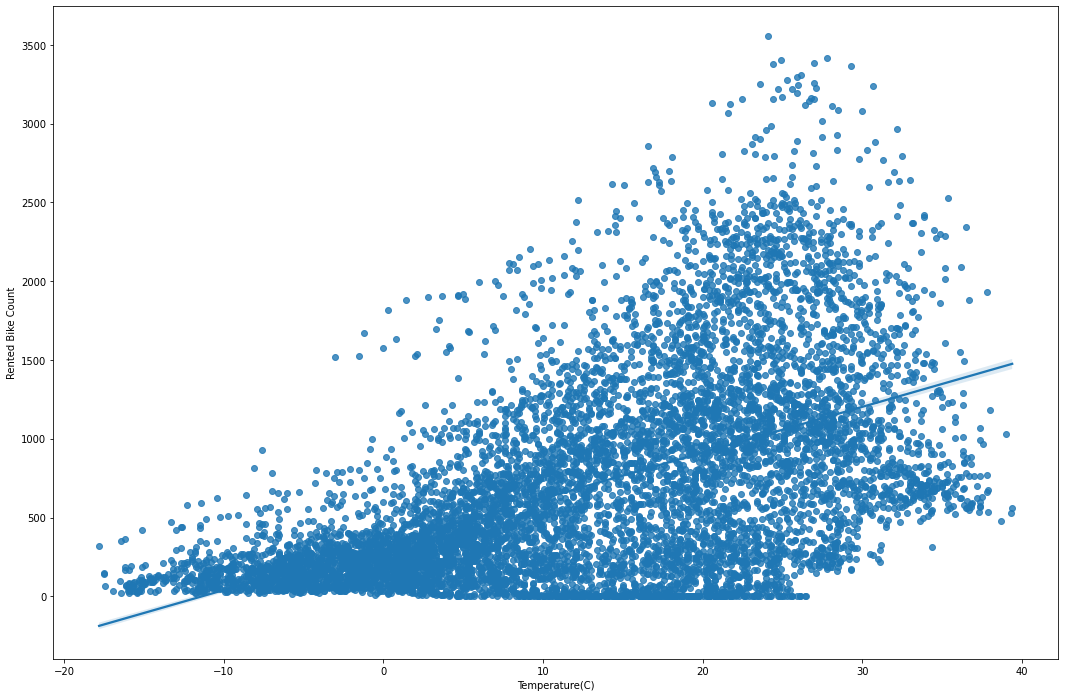

In [24]:

fig, ax = plt.subplots(round(len(features_to_analyse) / 3),figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Rented Bike Count', data=df[features_to_analyse], ax=ax)


# **C -> Q (Categorical to Quantitative relationship)**

In [25]:
# quantitative_features_list[1:] as the Second column is Rented Car Price and we want to keep it
categorical_features = [a for a in quantitative_features_list[1:] + df.columns.tolist() if (a not in quantitative_features_list[1:]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,Rented Bike Count,Seasons,Holiday,Functioning Day
0,254,Winter,No Holiday,Yes
1,204,Winter,No Holiday,Yes
2,173,Winter,No Holiday,Yes
3,107,Winter,No Holiday,Yes
4,78,Winter,No Holiday,Yes


In [26]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 3 non numerical features including:
['Seasons', 'Holiday', 'Functioning Day']


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

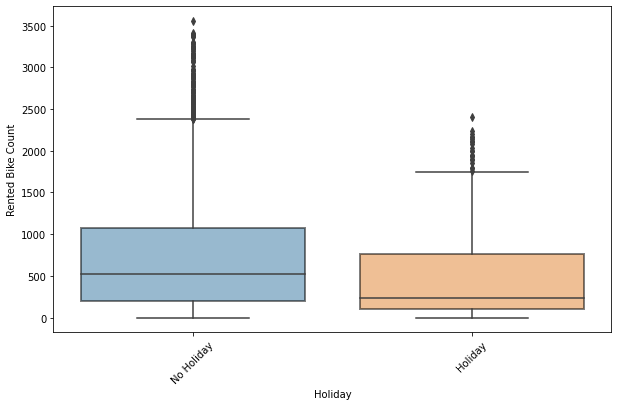

In [27]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Holiday', y='Rented Bike Count', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

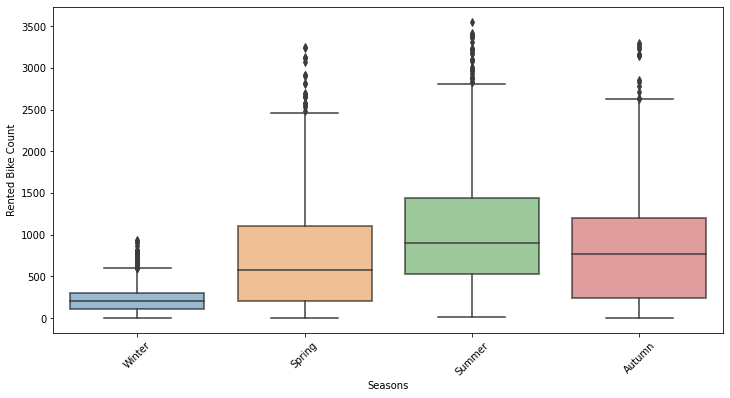

In [28]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Seasons', y='Rented Bike Count', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

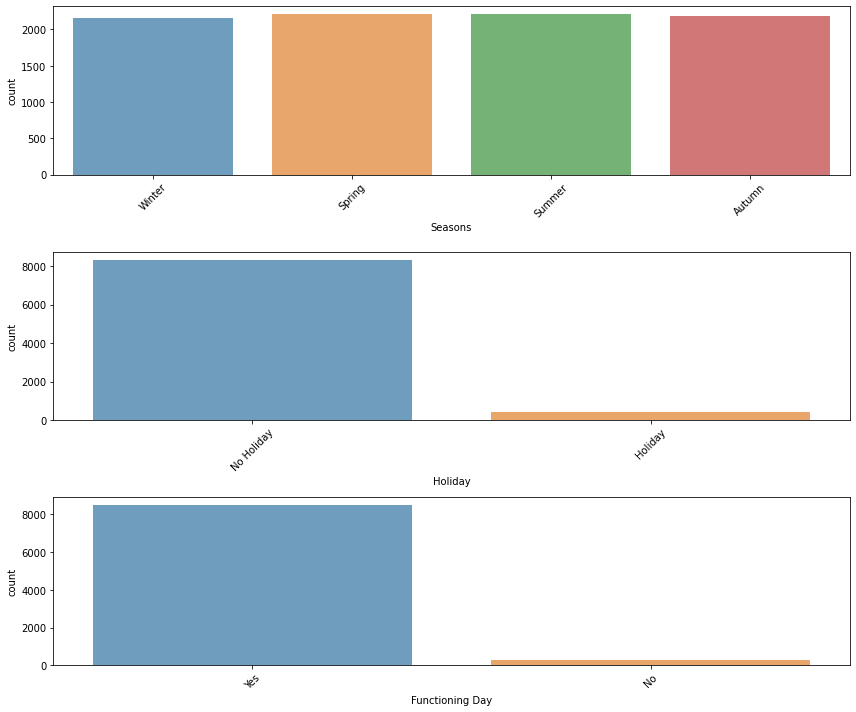

In [29]:
fig, axes = plt.subplots(round(len(df_not_num.columns)), 1, figsize=(12, 10))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

# **Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.**

What is Train/Test
Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the the data set into two sets: a training set and a testing set.

1.80% for training, and 20% for testing.

2.You train the model using the training set.

3.You test the model using the testing set.

4.Train the model means create the model.

5.Test the model means test the accuracy of the model.

The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 

train, val = train_test_split(df_num, test_size=0.25)

In [31]:
print('Dimension of df_num_x dataframe:',df_num_x.shape)
print('Dimension of df_num_y dataframe:',df_num_y.shape)
print('Dimension of test_x dataframe:',test_x.shape)
print('Dimension of test_y dataframe:',_y.shape)

NameError: ignored


# **Ridge(L2) Regression**

In [ ]:
ridge = Ridge()
ridge

In [ ]:
ridge.fit(df_num_x,df_num_y)
ridge_score = ridge.score(test_x,test_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

In [ ]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)


# **Lasso(L1) Regression**

In [ ]:
lasso = Lasso()
lasso

In [ ]:
lasso.fit(df_num_x,df_num_y)
lasso_score = lasso.score(test_x,test_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

In [ ]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

# **conclusion**
linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.You can see that the value of root mean squared error is 0.4364, which is less than 10% of the mean value of the temperature(C)i.e. 12.882(C). This means that our algorithm did a decent job.